# Kaggle Competition: S4 E11  
**Author**: Tomasz Lasota  
**Date**: 28 Nov 2024  
**Notebook Overview**: This notebook documents the approach, analysis, and insights for the Kaggle competition **S4 E11**. The primary objective is to explore data from a mental health survey to identify factors contributing to depression. The notebook includes exploratory data analysis, feature engineering, and predictive modeling using CatBoostClassifier.

---

## Table of Contents
1. [Introduction](#introduction)  
2. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)  
3. [Feature Engineering](#feature-engineering)  
4. [Modeling](#modeling)  
5. [Results and Discussion](#results-and-discussion)  
6. [Conclusion](#conclusion)

---

## 1. Introduction
### Objective  
The goal of this competition is to analyze mental health survey data and identify factors that contribute to depression. By understanding these factors, this analysis can help develop better strategies for prevention and intervention.

### Approach  
This notebook follows a structured approach:  
- **Exploratory Data Analysis (EDA)**: Identify patterns and relationships within the data.  
- **Feature Engineering**: Transform features to enhance model performance.  
- **Modeling**: Build and evaluate predictive models using ANNs.

---

## 2. Exploratory Data Analysis (EDA)
### Key Insights  
- **Target Variable (Label)**:  
  The dataset exhibits an **imbalance** in the target labels:  
  - **Non-Depression**: Over 115,000 samples.  
  - **Depression**: Approximately 25,000 samples.  

- **Feature Balance**:  
  Key features such as **Gender**, **Family History of Mental Illness**, **Suicidal Thoughts**, and **Age** are well-balanced across the dataset.

- **Missing Data**:  
  Significant percentages of missing values were observed in the following features:  
  - **Academic Pressure**, **Work Pressure**, **Study Satisfaction**, and **Job Satisfaction**.  
    - This is likely due to individuals being categorized as either students or working professionals, with:  
      - Students not answering **Work Pressure** or **Job Satisfaction** questions.  
      - Working individuals not answering **Academic Pressure** or **Study Satisfaction** questions.  

- **Feature Relationships Summary**:

- **Gender and Family History of Mental Illness**:  
  Both features showed **very little correlation** with the target label (depression).

- **Suicidal Thoughts**:  
  This feature exhibited a **strong positive correlation** with depression, indicating its significance in predicting mental health conditions.

- **Age**:  
  Depression cases were predominantly observed among **younger adults (<35 years old)**.

- **GCPA (Grade Point Average)**:  
  This feature showed **poor correlation** with the target label.

- **Academic and Work Pressure**:  
  Both features were **strongly correlated** with depression, highlighting the role of stress in mental health conditions.

- **Financial Stress**:  
  Financial concerns were another factor strongly linked to depression.

- **Gender**:  
  No evidence suggested that gender was correlated with depression.

- **Depression Cases by Demographic**:  
  The **highest percentage of depression cases** occurred among students, underscoring the impact of academic pressure and related stressors. 
- **Visualizations**: Include histograms and box plots to illustrate insights.

---

## 3. Feature Engineering
### Steps Taken  
1. **Data Cleaning**: Handled missing values, outliers, and inconsistencies.  
2. **Feature Transformation**: Applied scaling and encoding techniques.  
3. **Feature Creation**: Generated new features based on domain knowledge.  
4. **Feature Selection**: Identified and retained the most impactful features for modeling.

---

## 4. Modeling  
### Overview  
Artificial Neural Networks (ANNs) were selected as the modeling approach due to their ability to capture complex relationships. Two models were developed and evaluated.

### Model Performance  

#### Model 2  
| Metric         | Class 0 | Class 1 | Macro Avg | Weighted Avg |
|----------------|---------|---------|-----------|--------------|
| Precision      | 0.96    | 0.85    | 0.90      | 0.94         |
| Recall         | 0.97    | 0.82    | 0.89      | 0.94         |
| F1-Score       | 0.96    | 0.83    | 0.90      | 0.94         |
| **Accuracy**   | **0.94** |         |           |              |

### Observations  
1. **Strong Performance for Class 0**: Model performed well for Class 0 (non-depressed individuals) across all metrics.  
2. **Challenges with Class 1**: Slight improvements in precision for Class 1 were offset by lower recall, indicating room for better detection of depressed individuals.  
3. **Good overall accuracy**: The model achieves an overall accuracy of 0.94, indicating a strong performance across both classes (Note the classes are still rather unbalanced - accuracy might not be the best metrics here).

---

## 5. Results and Discussion
### Key Findings  
- Model achieved strong overall accuracy (94%) and macro F1-scores (0.90).  
- Class 0 was consistently predicted with high precision and recall, while Class 1 had slightly lower recall.  
- The models' performance is robust, but further improvements could focus on better recall for detecting individuals experiencing depression.

### Limitations  
- Imbalanced classes may have impacted the model's ability to generalize for Class 1.  
- Additional feature engineering or alternative architectures could enhance recall for Class 1.

---

## 6. Conclusion
This analysis successfully identified patterns and built predictive models using ANNs to classify individuals based on mental health survey data.  
- **Accuracy**: Model achieved 94% accuracy.  
- **Future Directions**: To improve recall for detecting depression, future work could explore alternative sampling strategies, additional features, or advanced modeling techniques.

---

**Thank You!**  
Feel free to share feedback or suggestions to improve this notebook.


In [74]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [75]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## [2] Exploratory Data Analysis

---

## Objectives  

1. **Key Influential Factors**  
   - Identify the most impactful variables contributing to an individual’s mental health status.  
   - Determine how demographic, lifestyle, and professional factors interact with mental health outcomes.  

2. **Correlation of Age and Gender with Mental Health**  
   - Explore how mental health conditions vary across age groups and between genders.  
   - Investigate whether certain demographics are more vulnerable to mental health challenges.  

3. **Impact of Work-Related Stress and Job Type**  
   - Assess the relationship between work-related stress and mental health status.  
   - Examine how different job roles or industries contribute to mental well-being or stress levels.  

4. **Lifestyle Factors and Mental Health Outcomes**  
   - Investigate the role of dietary habits, physical activity, and sleep patterns in influencing mental health.  
   - Determine whether certain lifestyle choices correlate with better or worse mental health outcomes.  

5. **Influence of Academic or Professional Pressures**  
   - Analyze the effect of academic or workplace expectations on mental health.  
   - Identify trends linking high-pressure environments with increased mental health issues.  

---

In [76]:
df.head(2)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [78]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


([<matplotlib.axis.XTick at 0x29d0b252d70>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Depressed')])

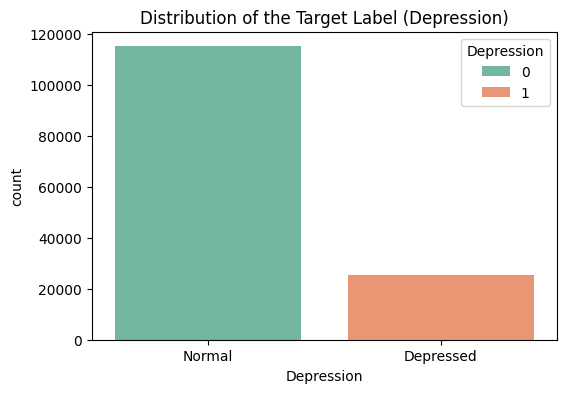

In [79]:
plt.figure(figsize=(6, 4))
plt.title("Distribution of the Target Label (Depression)")
sns.countplot(x="Depression", data=df, palette="Set2", hue="Depression")
plt.xticks([0,1], ["Normal", "Depressed"])

In [80]:
df["Depression"].value_counts()

Depression
0    115133
1     25567
Name: count, dtype: int64

<Axes: title={'center': 'Gender Distribution vs Target Label'}, xlabel='Gender', ylabel='count'>

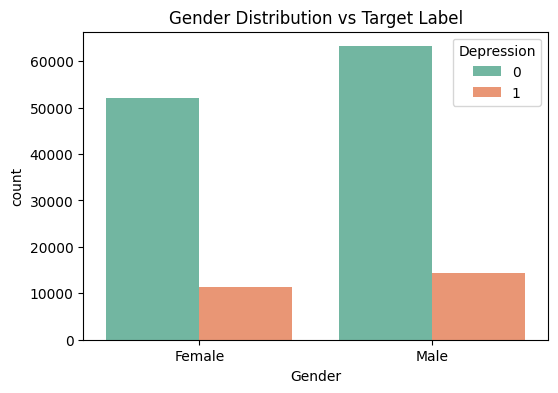

In [81]:
plt.figure(figsize=(6, 4))
plt.title("Gender Distribution vs Target Label")
sns.countplot(x="Gender", data=df, palette="Set2", hue="Depression")

In [82]:
df["Gender"].value_counts()

Gender
Male      77464
Female    63236
Name: count, dtype: int64

<Axes: title={'center': 'Mental Illness in Family vs Target Label'}, xlabel='Family History of Mental Illness', ylabel='count'>

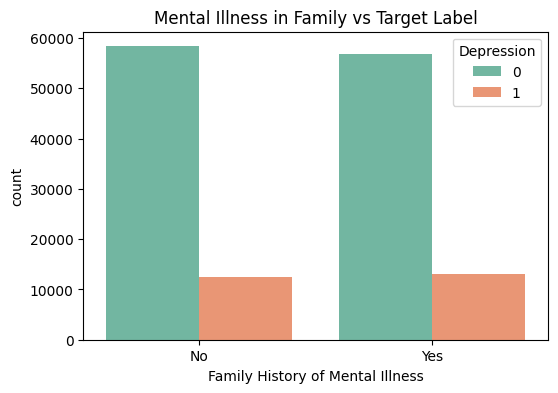

In [83]:
plt.figure(figsize=(6, 4))
plt.title("Mental Illness in Family vs Target Label")
sns.countplot(x="Family History of Mental Illness", data=df, palette="Set2", hue="Depression")

In [84]:
df["Family History of Mental Illness"].value_counts()

Family History of Mental Illness
No     70758
Yes    69942
Name: count, dtype: int64

<Axes: title={'center': 'Suicidal thoughts vs Target Label'}, xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

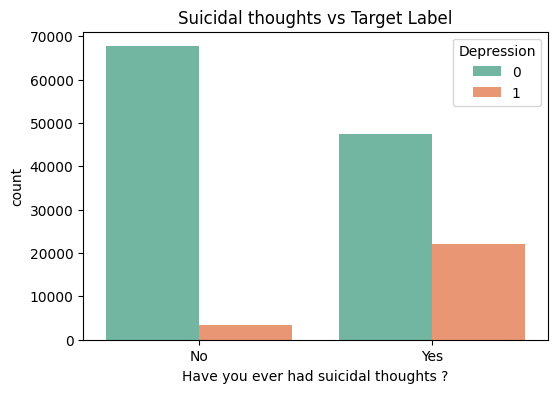

In [85]:
plt.figure(figsize=(6, 4))
plt.title("Suicidal thoughts vs Target Label")
sns.countplot(x="Have you ever had suicidal thoughts ?", data=df, palette="Set2", hue="Depression")

In [86]:
df["Have you ever had suicidal thoughts ?"].value_counts()

Have you ever had suicidal thoughts ?
No     71138
Yes    69562
Name: count, dtype: int64

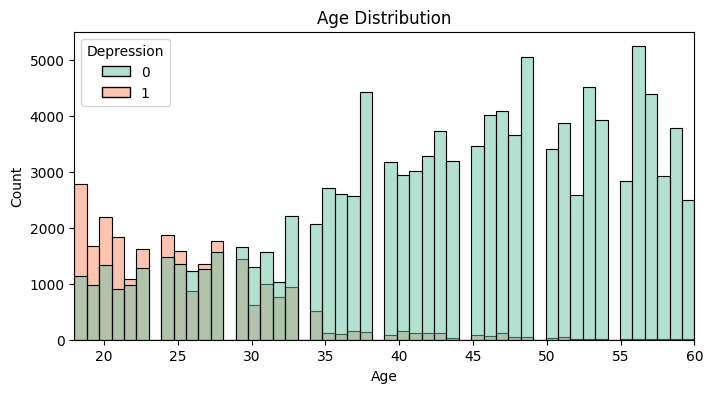

In [87]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="Age", bins=50, palette="Set2", hue="Depression")
plt.title("Age Distribution")
plt.xlim(18, 60)
plt.show()

Text(0.5, 1.0, 'Suicidal thoughts vs Age')

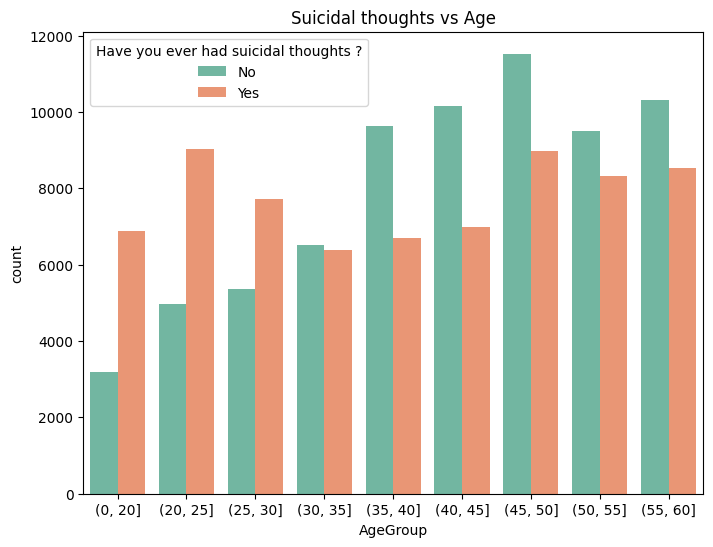

In [88]:
bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60]
df["AgeGroup"] = pd.cut(df["Age"], bins)
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x="AgeGroup", hue="Have you ever had suicidal thoughts ?", palette="Set2")
plt.title("Suicidal thoughts vs Age")

Text(0.5, 1.0, 'Depression vs Age')

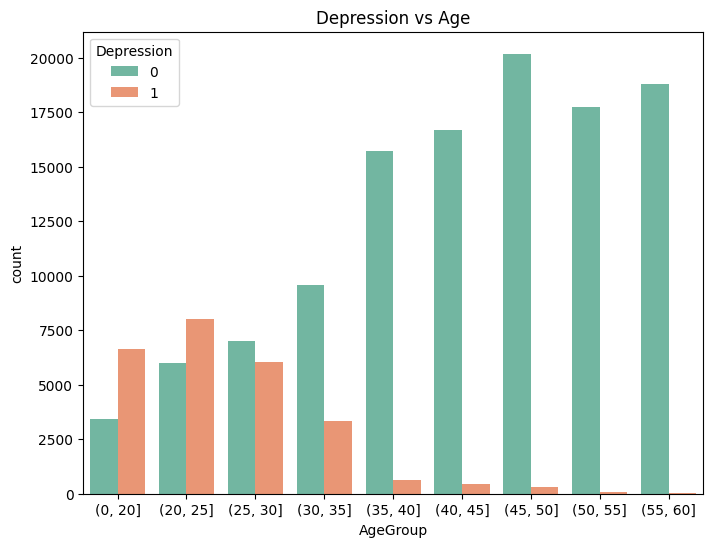

In [89]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x="AgeGroup", hue="Depression", palette="Set2")
plt.title("Depression vs Age")

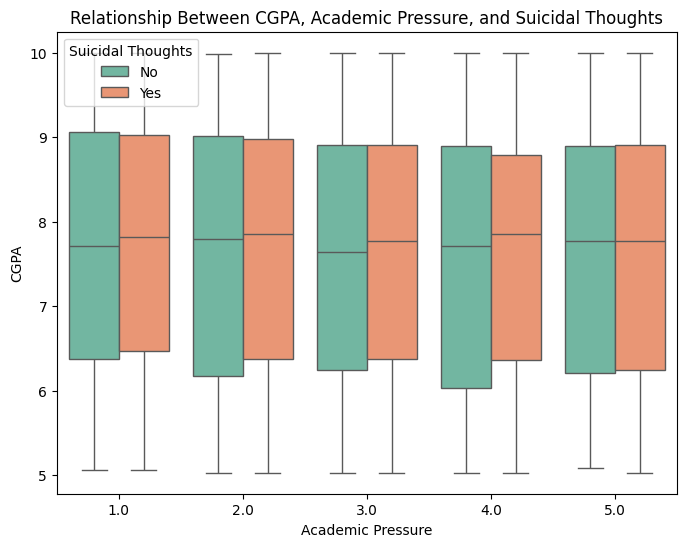

In [90]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Academic Pressure", y="CGPA", hue="Have you ever had suicidal thoughts ?", palette="Set2")
plt.title("Relationship Between CGPA, Academic Pressure, and Suicidal Thoughts")
plt.xlabel("Academic Pressure")
plt.ylabel("CGPA")
plt.legend(title="Suicidal Thoughts", loc="upper left")

Text(0.5, 1.0, 'Count of Academic Pressure')

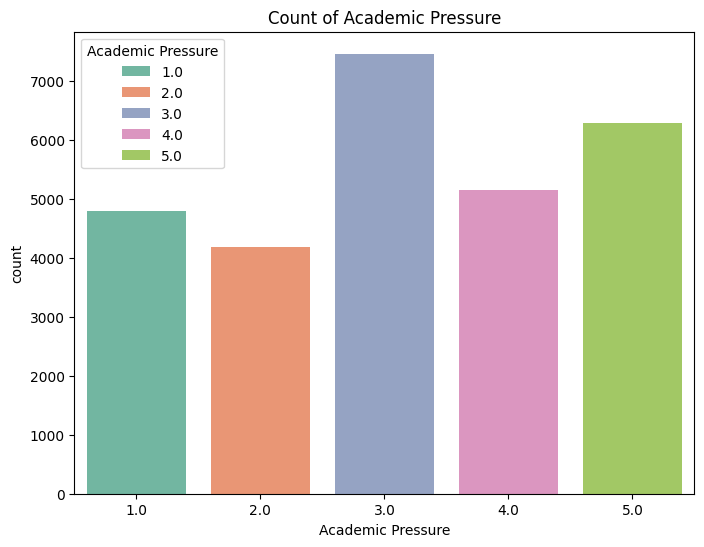

In [91]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x="Academic Pressure", hue="Academic Pressure", palette="Set2")
plt.title("Count of Academic Pressure")

Text(0.5, 1.0, 'CGPA vs Depression')

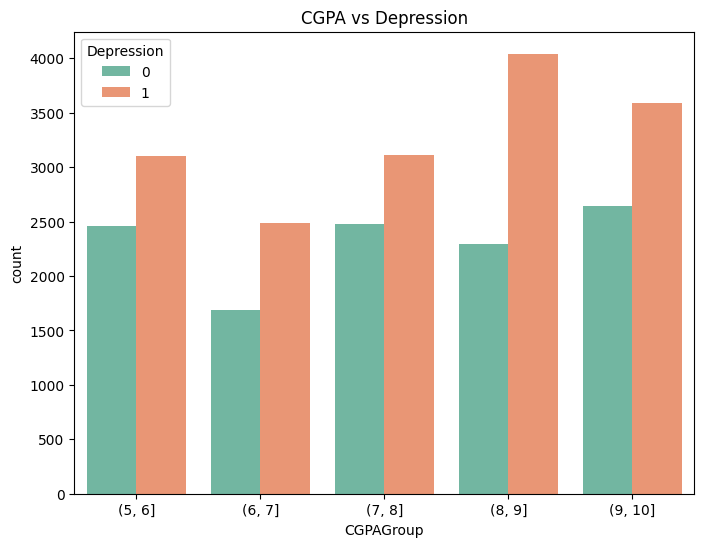

In [92]:
bins = [5, 6, 7, 8, 9, 10]
df["CGPAGroup"] = pd.cut(df["CGPA"], bins)
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x="CGPAGroup", hue="Depression", palette="Set2")
plt.title("CGPA vs Depression")

Text(0.5, 1.0, 'Depression vs Academic Pressure')

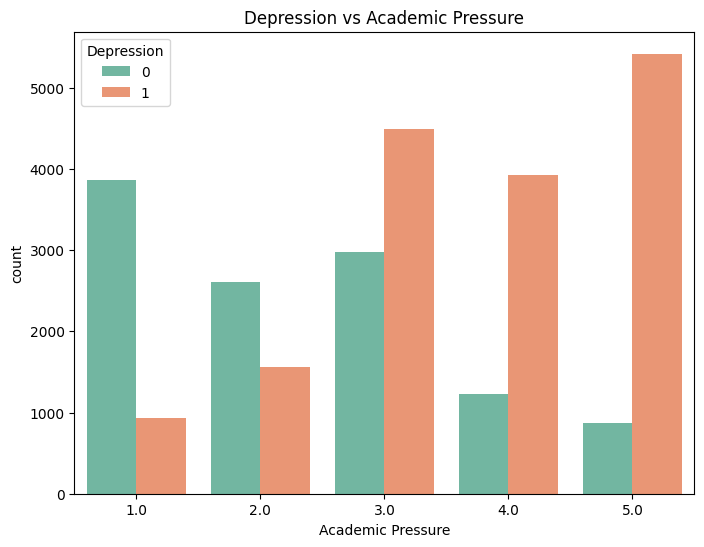

In [93]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x="Academic Pressure", hue="Depression", palette="Set2")
plt.title("Depression vs Academic Pressure")

Text(0.5, 1.0, 'Suicidal thoughts vs Academic Pressure')

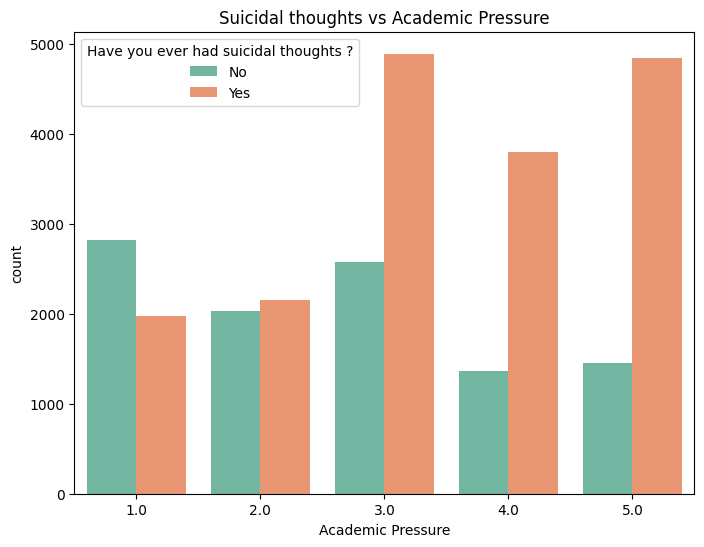

In [94]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x="Academic Pressure", hue="Have you ever had suicidal thoughts ?", palette="Set2")
plt.title("Suicidal thoughts vs Academic Pressure")

Text(0.5, 1.0, 'Suicidal thoughts vs work Pressure')

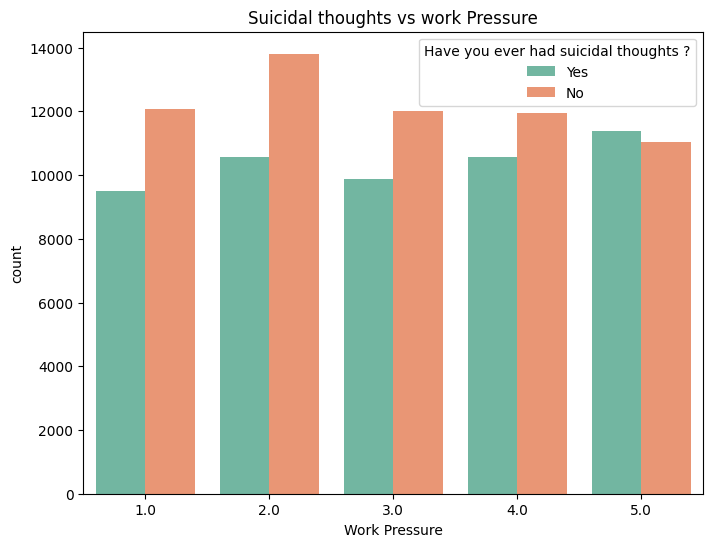

In [95]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x="Work Pressure", hue="Have you ever had suicidal thoughts ?", palette="Set2")
plt.title("Suicidal thoughts vs work Pressure")

Text(0.5, 1.0, 'Count of Work Pressure')

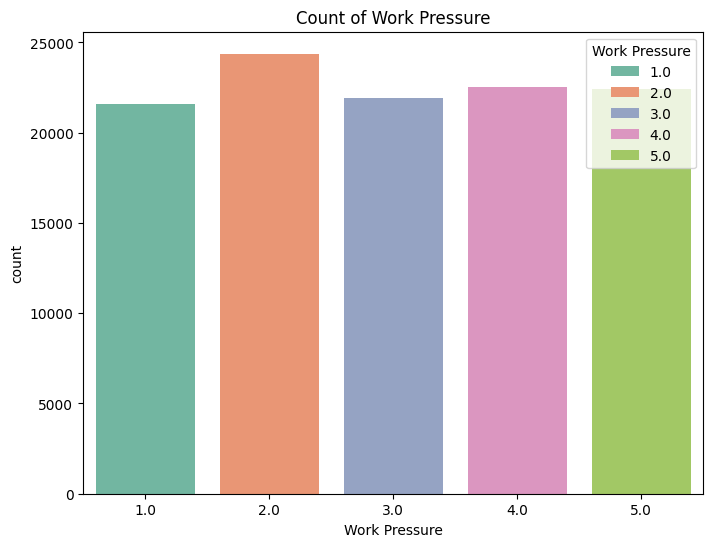

In [96]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x="Work Pressure", hue="Work Pressure", palette="Set2")
plt.title("Count of Work Pressure")

Text(0.5, 1.0, 'Depression vs work Pressure')

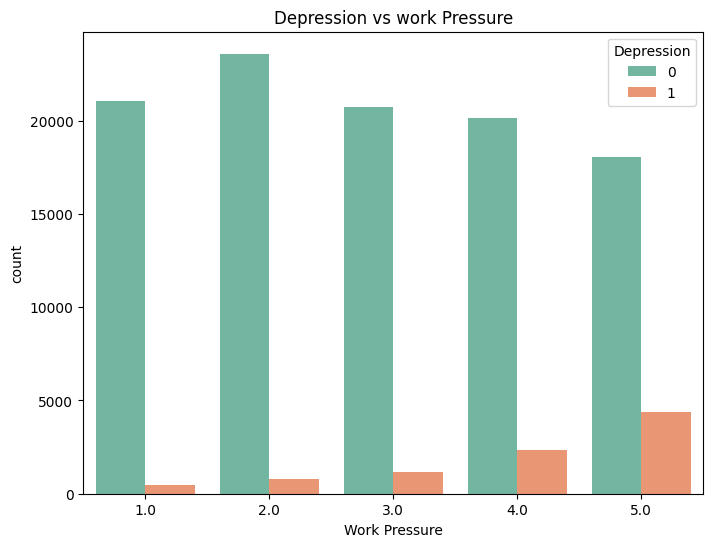

In [97]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x="Work Pressure", hue="Depression", palette="Set2")
plt.title("Depression vs work Pressure")

Text(0.5, 1.0, 'Depression vs Financial Stress')

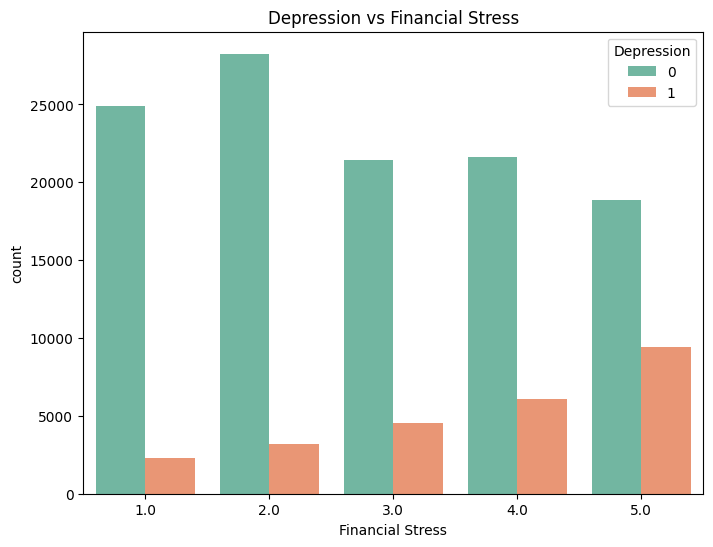

In [98]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x="Financial Stress", hue="Depression", palette="Set2")
plt.title("Depression vs Financial Stress")

<Axes: title={'center': 'Gender vs Depression'}, xlabel='Gender', ylabel='count'>

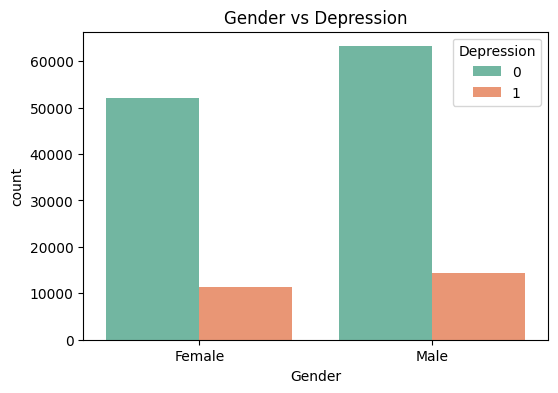

In [99]:
plt.figure(figsize=(6, 4))
plt.title("Gender vs Depression")
sns.countplot(x="Gender", data=df, hue="Depression", palette="Set2")

<Axes: title={'center': 'Professional/Student vs Depression'}, xlabel='Working Professional or Student', ylabel='count'>

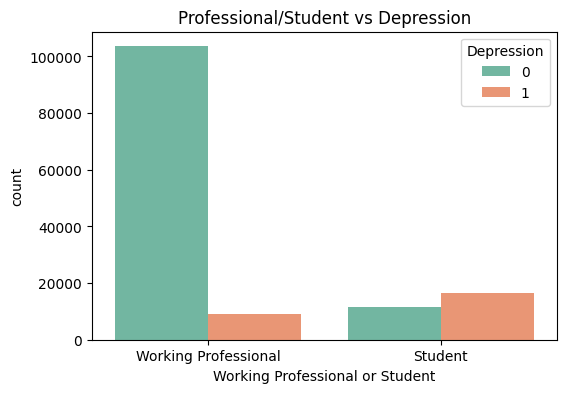

In [100]:

plt.figure(figsize=(6, 4))
plt.title("Professional/Student vs Depression")
sns.countplot(x="Working Professional or Student", data=df, hue="Depression", palette="Set2")

## [3] Feature Engineering and Data Cleaning

In [101]:
# NOTE: test data set has been previously reviewed. It requires the same cleaning and feature generation
#       as our training set
df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
AgeGroup                                

In [102]:
# remove the following columns: CGPA and Profession showed weak link to Depression
# most depression cases were found in younger adults of which vast majority were students
df.drop(columns=["CGPA", "CGPAGroup", "AgeGroup", "Profession"], axis=1, inplace=True) 
df_test.drop(columns=["CGPA", "Profession"], axis=1, inplace=True)

In [103]:
# Academic Pressure and Work Pressure can be treated as a single metrics (same scale as well)
# Note that on occasion values are given for both the Academic Pressure and Work Pressure for a single entry
# In this case a decision was made to take the highest value in order to maintain scale 1 - 5
df["Work-Study Stress"] = np.where(
    (df["Academic Pressure"] > 0) & (df["Work Pressure"] > 0),  # Condition
    df[["Academic Pressure", "Work Pressure"]].max(axis=1),     # Take the max value
    df["Academic Pressure"].fillna(0) + df["Work Pressure"].fillna(0)  # Otherwise, take the sum
)

df_test["Work-Study Stress"] = np.where(
    (df_test["Academic Pressure"] > 0) & (df_test["Work Pressure"] > 0),  # Condition
    df_test[["Academic Pressure", "Work Pressure"]].max(axis=1),     # Take the max value
    df_test["Academic Pressure"].fillna(0) + df_test["Work Pressure"].fillna(0)  # Otherwise, take the sum
)

In [104]:
df["Work-Study Stress"].describe()

count    140700.000000
mean          3.026958
std           1.402330
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Work-Study Stress, dtype: float64

In [105]:
df.drop(columns=["Academic Pressure", "Work Pressure"], inplace=True)
df_test.drop(columns=["Academic Pressure", "Work Pressure"], inplace=True)

In [106]:
df["Work-Study Stress"].describe()

count    140700.000000
mean          3.026958
std           1.402330
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Work-Study Stress, dtype: float64

In [107]:
# Job and Study Satisfaction can be treated as a single metrics (same scale as well)
# Note that on occasion values are given for both the Job and Study Satisfaction for a single entry
# In this case a decision was made to take the highest value in order to maintain scale 1 - 5
df["Work-Study Satisfaction"] = (df["Study Satisfaction"].fillna(0) + df["Job Satisfaction"].fillna(0))
df["Work-Study Satisfaction"] = np.where(
    (df["Study Satisfaction"] > 0) & (df["Job Satisfaction"] > 0),  # Condition
    df[["Study Satisfaction", "Job Satisfaction"]].max(axis=1),     # Take the max value
    df["Study Satisfaction"].fillna(0) + df["Job Satisfaction"].fillna(0)  # Otherwise, take the sum
)

df_test["Work-Study Satisfaction"] = (df_test["Study Satisfaction"].fillna(0) + df_test["Job Satisfaction"].fillna(0))
df_test["Work-Study Satisfaction"] = np.where(
    (df_test["Study Satisfaction"] > 0) & (df_test["Job Satisfaction"] > 0),  # Condition
    df_test[["Study Satisfaction", "Job Satisfaction"]].max(axis=1),     # Take the max value
    df_test["Study Satisfaction"].fillna(0) + df_test["Job Satisfaction"].fillna(0)  # Otherwise, take the sum
)

In [108]:
df.drop(columns=["Study Satisfaction", "Job Satisfaction", "id"], inplace=True)
df_test.drop(columns=["Study Satisfaction", "Job Satisfaction"], inplace=True)

In [109]:
df["Work-Study Satisfaction"].describe()

count    140700.000000
mean          2.968252
std           1.405485
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Work-Study Satisfaction, dtype: float64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Sleep Duration                         140700 non-null  object 
 6   Dietary Habits                         140696 non-null  object 
 7   Degree                                 140698 non-null  object 
 8   Have you ever had suicidal thoughts ?  140700 non-null  object 
 9   Work/Study Hours                       140700 non-null  float64
 10  Financial Stress                       140696 non-null  

In [111]:
# Mapping Degrees into Categories for Simplification
# The 'degree' column in the dataset contains a wide variety of educational qualifications.
# To streamline the analysis, we group these degrees into broader categories:
# - 'Secondary Education': Includes pre-university qualifications like Class 12.
# - 'Undergraduate': Includes bachelor's degrees across various fields.
# - 'Postgraduate': Includes master's degrees and equivalent qualifications.
# - 'Doctorate': Includes PhDs and professional doctorates like MD and MBBS.
# 
# This mapping will be used to replace individual degree names in the dataset with their corresponding categories.
degree_mapping = {
    'Class 12': 'Secondary Education',
    'B.Ed': 'Undergraduate',
    'B.Arch': 'Undergraduate',
    'B.Com': 'Undergraduate',
    'B.Pharm': 'Undergraduate',
    'BCA': 'Undergraduate',
    'BBA': 'Undergraduate',
    'BSc': 'Undergraduate',
    'B.Tech': 'Undergraduate',
    'M.Ed': 'Postgraduate',
    'MCA': 'Postgraduate',
    'MSc': 'Postgraduate',
    'MBA': 'Postgraduate',
    'MA': 'Postgraduate',
    'M.Tech': 'Postgraduate',
    'M.Pharm': 'Postgraduate',
    'LLM': 'Postgraduate',
    'BHM': 'Undergraduate',
    'ME': 'Postgraduate',
    'MD': 'Doctorate',
    'PhD': 'Doctorate',
    'MHM': 'Postgraduate',
    'BE': 'Undergraduate',
    'MBBS': 'Doctorate',
    'M.Com': 'Postgraduate',
    'BA': 'Undergraduate',
    'LLB': 'Undergraduate'
}

In [112]:
df["Degree Grouped"] = df["Degree"].map(degree_mapping).fillna("Other")
df_test["Degree Grouped"] = df_test["Degree"].map(degree_mapping).fillna("Other")

In [113]:
df.drop("Degree", axis=1, inplace=True)
df_test.drop("Degree", axis=1, inplace=True)

In [114]:
allowed_values = {"Moderate", "Unhealthy", "Healthy"}
df["Dietary Habits"] = df["Dietary Habits"].apply(lambda x: x if x in allowed_values else "Other")
df_test["Dietary Habits"] = df_test["Dietary Habits"].apply(lambda x: x if x in allowed_values else "Other")

([<matplotlib.patches.Wedge at 0x29d1ff430a0>,
 [Text(0.48929668154021766, 0.9851846311396311, 'Moderate'),
  Text(-1.0933233200804588, -0.12101288265404953, 'Unhealthy'),
  Text(0.5941506574871058, -0.925734841197867, 'Healthy'),
  Text(1.0999998001071551, -0.0006631472077189341, 'Other')],
 [Text(0.26688909902193686, 0.5373734351670714, '35.3%'),
  Text(-0.596358174589341, -0.06600702690220882, '32.9%'),
  Text(0.3240821768111486, -0.5049462770170183, '31.8%'),
  Text(0.599999890967539, -0.0003617166587557822, '0.0%')])

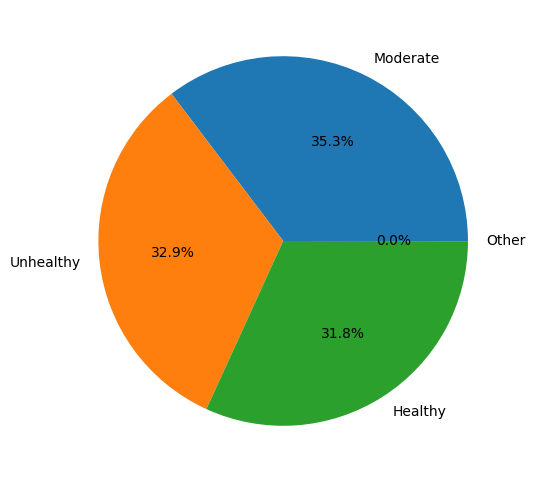

In [115]:
dietary_counts = df["Dietary Habits"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    dietary_counts, 
    labels=dietary_counts.index, 
    autopct='%1.1f%%',
)

In [116]:
df["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [117]:
# bin values into 4/5 distinct categories
df["Sleep Duration"] = df["Sleep Duration"].replace(
    ["3-4 hours", "4-5 hours", "2-3 hours", "1-2 hours", "1-3 hours"], "Less than 5 hours"
)
df["Sleep Duration"] = df["Sleep Duration"].replace(
    ["6-7 hours", "6-8 hours"], "7-8 hours"
)
df["Sleep Duration"] = df["Sleep Duration"].replace(
    ["8-9 hours", "9-11 hours", "9-10 hours"], "More than 8 hours"
)


df_test["Sleep Duration"] = df_test["Sleep Duration"].replace(
    ["3-4 hours", "4-5 hours", "2-3 hours", "1-2 hours", "1-3 hours"], "Less than 5 hours"
)
df_test["Sleep Duration"] = df_test["Sleep Duration"].replace(
    ["6-7 hours", "6-8 hours"], "7-8 hours"
)
df_test["Sleep Duration"] = df_test["Sleep Duration"].replace(
    ["8-9 hours", "9-11 hours", "9-10 hours"], "More than 8 hours"
)

In [118]:
allowed_val = {"Less than 5 hours", "7-8 hours", "More than 8 hours", "5-6 hours"}
df["Sleep Duration"] = df["Sleep Duration"].apply(lambda x: x if x in allowed_val else "unknown")
df_test["Sleep Duration"] = df_test["Sleep Duration"].apply(lambda x: x if x in allowed_val else "unknown")

([<matplotlib.patches.Wedge at 0x29d1ffa2e90>,
 [Text(0.7121959510572333, 0.838317915410188, 'Less than 5 hours'),
  Text(-0.918449776957005, 0.6053511437237298, '7-8 hours'),
  Text(-0.6183932827863408, -0.9097195984503867, 'More than 8 hours'),
  Text(0.8274730516588445, -0.7247677895563512, '5-6 hours'),
  Text(1.0999996246718449, -0.0009086923576235576, 'unknown')],
 [Text(0.38847051875849087, 0.4572643174964661, '27.6%'),
  Text(-0.5009726056129118, 0.33019153294021625, '26.3%'),
  Text(-0.33730542697436766, -0.49621069006384727, '23.3%'),
  Text(0.4513489372684606, -0.3953278852125552, '22.8%'),
  Text(0.5999997952755517, -0.0004956503768855768, '0.0%')])

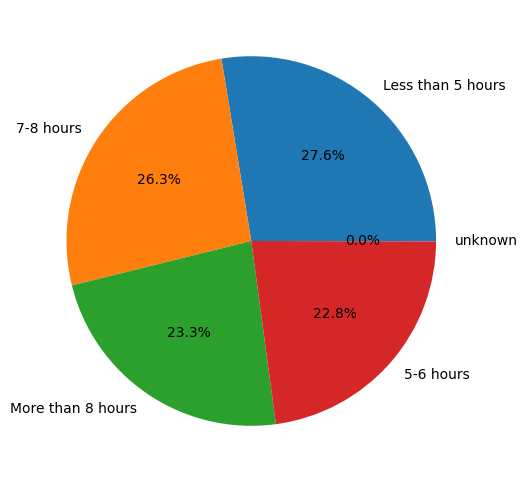

In [119]:
sleep_counts = df["Sleep Duration"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    sleep_counts, 
    labels=sleep_counts.index, 
    autopct='%1.1f%%',
)

In [120]:
df["Age"] = df["Age"].astype(int)
df_test["Age"] = df_test["Age"].astype(int)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  int32  
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Sleep Duration                         140700 non-null  object 
 6   Dietary Habits                         140700 non-null  object 
 7   Have you ever had suicidal thoughts ?  140700 non-null  object 
 8   Work/Study Hours                       140700 non-null  float64
 9   Financial Stress                       140696 non-null  float64
 10  Family History of Mental Illness       140700 non-null  

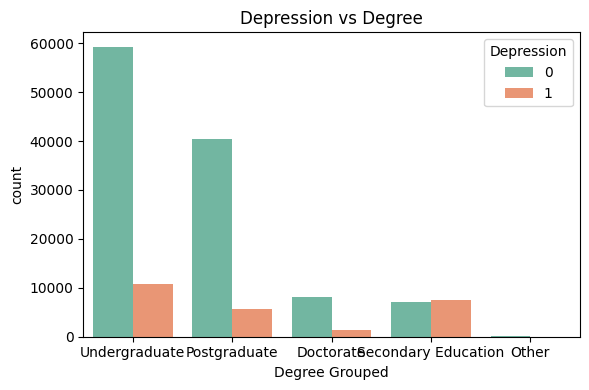

In [122]:
plt.figure(figsize=(6, 4))
sns.countplot(data = df, x="Degree Grouped", hue="Depression", palette="Set2")
plt.title("Depression vs Degree")
plt.tight_layout()

In [123]:
# drop unnecessary columns plus the columns post feature engineering
df.drop(columns=["Name", "City"], axis=1, inplace=True) 
df_test.drop(columns=["Name", "City"], axis=1, inplace=True)

## Splitting data into training and test sets

In [124]:
# assign to X and y
X = df.drop("Depression",axis=1)
y = df["Depression"]
X_validate = df_test.drop("id",axis=1)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=101)

## Add Pipeline for dealing with missing values

### Note: This solution is an update of the previous implementation that suffered from test_train contamination


In [130]:
numerical_cols = X_train.select_dtypes(include=["float", "int"]).columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns

# preprocessing of numerical data
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), # replaces missing values with median value for that col
    ("scaler", MinMaxScaler())])                   # scales the values 

# preprocessing of categorical data
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), # replaces missing values with the most frequent
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

## Building the model

In [133]:
# preprocessing of the data AFTER train test split to avoid test-train contamination
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_validate_processed = preprocessor.transform(X_validate)


In [134]:
model_1 = Sequential()

#input layer
model_1.add(Dense(128,  activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

# hidden layer
model_1.add(Dense(64, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))

# hidden layer
model_1.add(Dense(32, activation='relu'))
model_1.add(BatchNormalization())

# output layer
model_1.add(Dense(units=1,activation='sigmoid'))

# Compile model
model_1.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])

In [135]:
# define callback functions
early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=40, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=4)

In [137]:
model_1.fit(x=X_train_processed, 
          y=y_train, 
          epochs=100,
          batch_size=256,
          validation_data=(X_test_processed, y_test),
          callbacks=[early_stopping, lr_scheduler] 
          )

Epoch 1/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8190 - loss: 0.4163 - val_accuracy: 0.9374 - val_loss: 0.1699 - learning_rate: 0.0010
Epoch 2/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9283 - loss: 0.1874 - val_accuracy: 0.9394 - val_loss: 0.1550 - learning_rate: 0.0010
Epoch 3/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9321 - loss: 0.1729 - val_accuracy: 0.9388 - val_loss: 0.1535 - learning_rate: 0.0010
Epoch 4/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9345 - loss: 0.1661 - val_accuracy: 0.9392 - val_loss: 0.1526 - learning_rate: 0.0010
Epoch 5/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9344 - loss: 0.1670 - val_accuracy: 0.9385 - val_loss: 0.1534 - learning_rate: 0.0010
Epoch 6/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9344 - loss: 0.1655 - val_accuracy: 0.9394 - val_loss: 0.1526 - learning_rate: 0.0010
Epoch 7/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9340 - loss: 0

<Axes: >

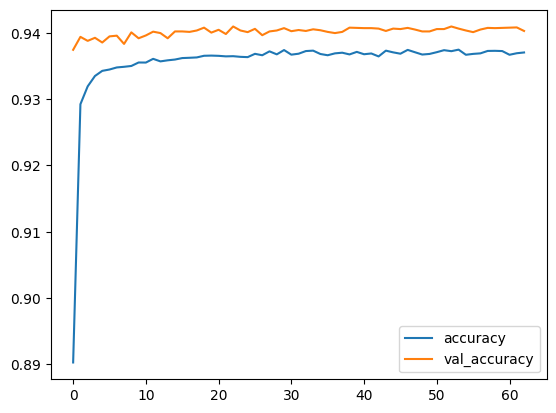

In [138]:
acc = pd.DataFrame(model_1.history.history)
acc[['accuracy','val_accuracy']].plot()

In [140]:
predictions = model_1.predict(X_test_processed)
if predictions.shape[1] ==1:
    predicted_classes = (predictions > 0.5).astype("int32").flatten()
else:
    predicted_classes = np.argmax(predictions, axis=1)

880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [141]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23099
           1       0.85      0.82      0.83      5041

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.90     28140
weighted avg       0.94      0.94      0.94     28140



In [ ]:
validation_predictions = model_1.predict(X_validate)
if validation_predictions.shape[1] ==1:
    predicted_classes_val = (validation_predictions > 0.5).astype("int32").flatten()
else:
    predicted_classes_val = np.argmax(validation_predictions, axis=1)

2932/2932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [ ]:

id_numbers = df_test["id"].values
len(predicted_classes_val)

93800

In [ ]:
df = pd.DataFrame({
    "id": id_numbers,
    "Depression": predicted_classes_val,
})
df.to_csv("TL_submission_20.csv", index=False)